# XG Boost

In [1]:
import numpy as np
import pandas as pd

## Part 1 - Data Preprocessing

### Data Loading

In [2]:
PATH = "../../../Model_Selection_Boosting/XGBoost/Python/Churn_Modelling.csv"

In [3]:
dataset = pd.read_csv(PATH)

In [4]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
X = dataset.iloc[:, 3:-1].values
y = dataset.iloc[:, -1].values

### Encoding the Categorical Variables

In [6]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])

In [7]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers=[('encoder', 
                                      OneHotEncoder(), [1])], 
                       remainder='passthrough')
X = np.array(ct.fit_transform(X))

### Train Test Split

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state=42)

## Part 2 - Model

In [9]:
from xgboost import XGBClassifier

classifier = XGBClassifier()
classifier.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

## Part 3 - Model Evaluation

### Prediction

In [10]:
sample = [[600, 'France', 'Male', 40, 3, 60000, 2, 1, 1, 50000]]

sample = np.array(sample)
sample[:, 2] = le.transform(sample[:, 2])
sample = np.array(ct.transform(sample))

In [11]:
print(classifier.predict(sample))

[0]


In [12]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_test.reshape(len(y_pred),1), y_pred.reshape(len(y_pred),1)), axis=1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [1 1]
 [1 0]
 [1 0]]


### K-Fold Cross Validation

In [13]:
from sklearn.model_selection import cross_val_score

accuracies = cross_val_score(estimator=classifier, X=X_train, 
                             y=y_train, cv=10, n_jobs=-1)

In [14]:
print("Mean \t\t\t%.2f" % accuracies.mean())
print("Standard Deviation \t%.2f" % accuracies.std())

Mean 			0.85
Standard Deviation 	0.01


### Confusion Matrix

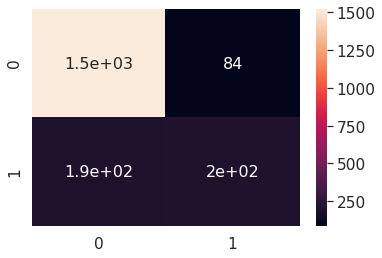

In [15]:
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, range(len(cm[0])), range(len(cm[0])))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16})
plt.show()

### Accuracy Score

In [16]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.861